<a href="https://colab.research.google.com/github/kelvinfoo123/MH3511-Data-Analysis-with-R/blob/main/MH3511_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

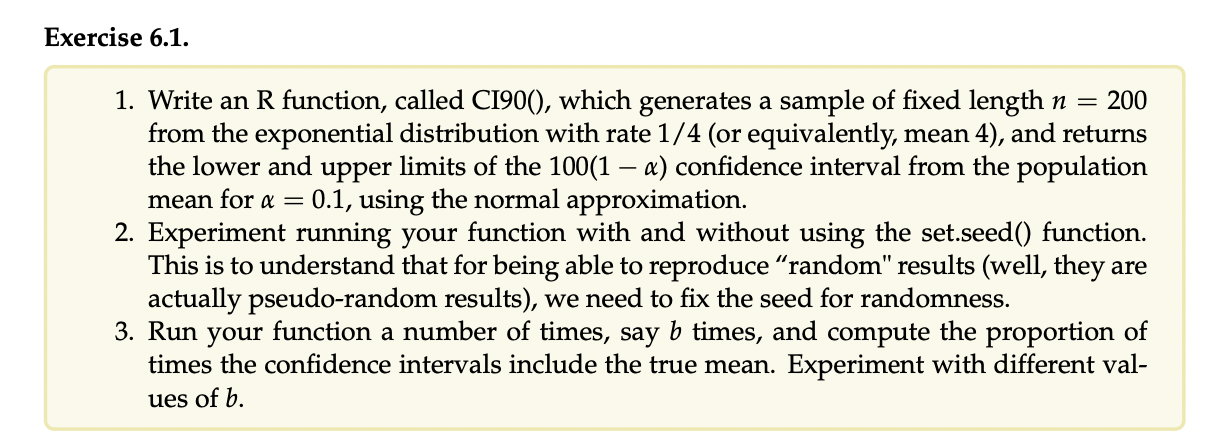

**Question 1**

In [ ]:
CI90 = function(){
  n = 200 
  alpha = 0.1 
  rate = 1/4 
  samples = rexp(n, rate = rate)
  xbar = mean(samples)
  sd = sd(samples)
  lb = xbar - qnorm(1 - alpha / 2) * sd / sqrt(n)
  ub = xbar + qnorm(1 - alpha / 2) * sd / sqrt(n)
  return (c(lb,ub))
}

In [ ]:
CI90()

[1] 3.808199 4.878323

**Question 2**

In [ ]:
# First set seed 
set.seed(10)
for (i in 1:2) {
  print(CI90())
}

[1] 3.787966 4.674339
[1] 3.407724 4.275545


In [ ]:
set.seed(10)
for (i in 1:2) {
  print(CI90())
}

[1] 3.787966 4.674339
[1] 3.407724 4.275545


- Setting seed allows reproducing the same result. 

In [ ]:
for (i in 1:2) {
  print(CI90())
}

[1] 3.465438 4.341614
[1] 3.943258 4.848345


In [ ]:
for (i in 1:2) {
  print(CI90())
}

[1] 3.637790 4.537262
[1] 3.551298 4.548149


- Without setting seed, the result is different everytime. 

**Question 3**
- We first try a small b, say b = 10. 


In [ ]:
b = 10 
lubounds = NULL # Initialize lubounds 

for (i in 1:b){
  lubounds = rbind(lubounds, CI90())
}

df = data.frame(lubounds)
df

X1,X2
<dbl>,<dbl>
3.517630,4.446214
3.960637,4.864122
3.566136,4.337987
3.438560,4.282893
3.698035,4.650433
3.598300,4.571304
3.707974,4.614115
3.741728,4.649158
4.201976,5.336480


In [ ]:
df$within_ci = ifelse((df$X1 <= 4) & (df$X2 >= 4), 1, 0) # If CI contains true mean of 4, then column equals 1. 
df

X1,X2,within_ci
<dbl>,<dbl>,<dbl>
3.517630,4.446214,1
3.960637,4.864122,1
3.566136,4.337987,1
3.438560,4.282893,1
3.698035,4.650433,1
3.598300,4.571304,1
3.707974,4.614115,1
3.741728,4.649158,1
4.201976,5.336480,0


In [ ]:
sum(df$within_ci) / 10 

[1] 0.8

- 80% of the CI contains the true mean of 4.

In [ ]:
# Try a larger b = 100 

b = 100
lubounds = NULL # Initialize lubounds 

for (i in 1:b){
  lubounds = rbind(lubounds, CI90())
}

df = data.frame(lubounds)
df$within_ci = ifelse((df$X1 <= 4) & (df$X2 >= 4), 1, 0) # If CI contains true mean of 4, then column equals 1. 
sum(df$within_ci) / b

[1] 0.92

In [ ]:
b = 1000
lubounds = NULL # Initialize lubounds 

for (i in 1:b){
  lubounds = rbind(lubounds, CI90())
}

df = data.frame(lubounds)
df$within_ci = ifelse((df$X1 <= 4) & (df$X2 >= 4), 1, 0) # If CI contains true mean of 4, then column equals 1. 
sum(df$within_ci) / b

[1] 0.898

In [ ]:
b = 10000
lubounds = NULL # Initialize lubounds 

for (i in 1:b){
  lubounds = rbind(lubounds, CI90())
}

df = data.frame(lubounds)
df$within_ci = ifelse((df$X1 <= 4) & (df$X2 >= 4), 1, 0) # If CI contains true mean of 4, then column equals 1. 
sum(df$within_ci) / b

[1] 0.8941

- For $\alpha = 0.1$, the mean should be within the CI 90% of the time. As we increase b, the probability that the mean is within the CI gets closer to 0.9. 

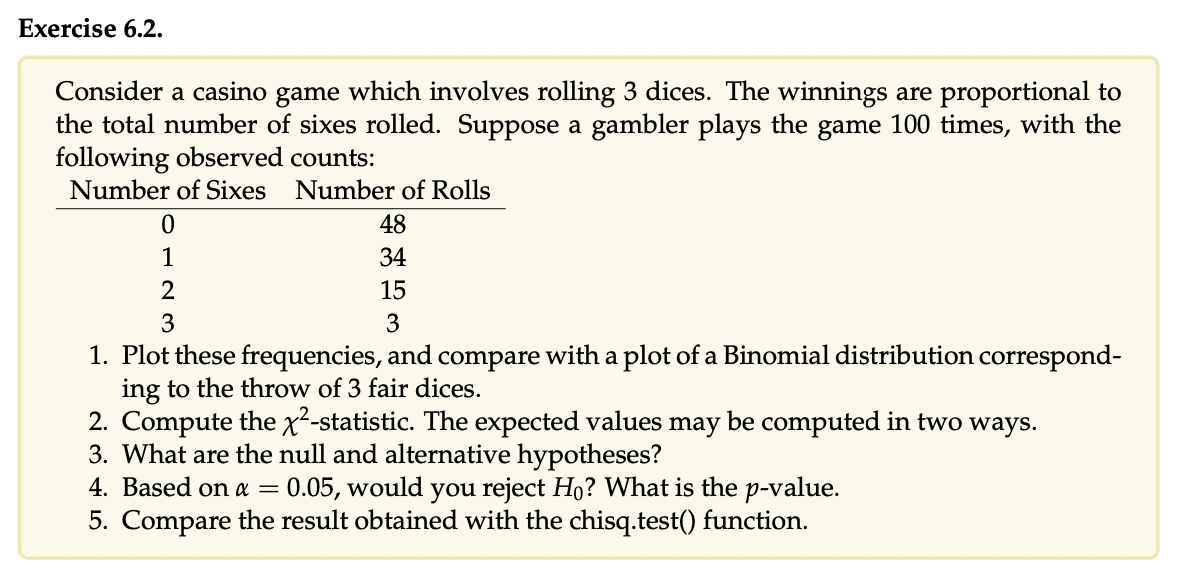

**Question 1**

In [ ]:
x = 0:3 
f = c(48, 34, 15, 3)

# Get sample mean 
xbar = 0 
for (i in x){ 
  xbar = xbar + f[i + 1] * x[i + 1]
}
xbar = xbar / sum(f)

# Get p in B(n,p) for binomial distribution 
p = xbar / 3
p

[1] 0.2433333

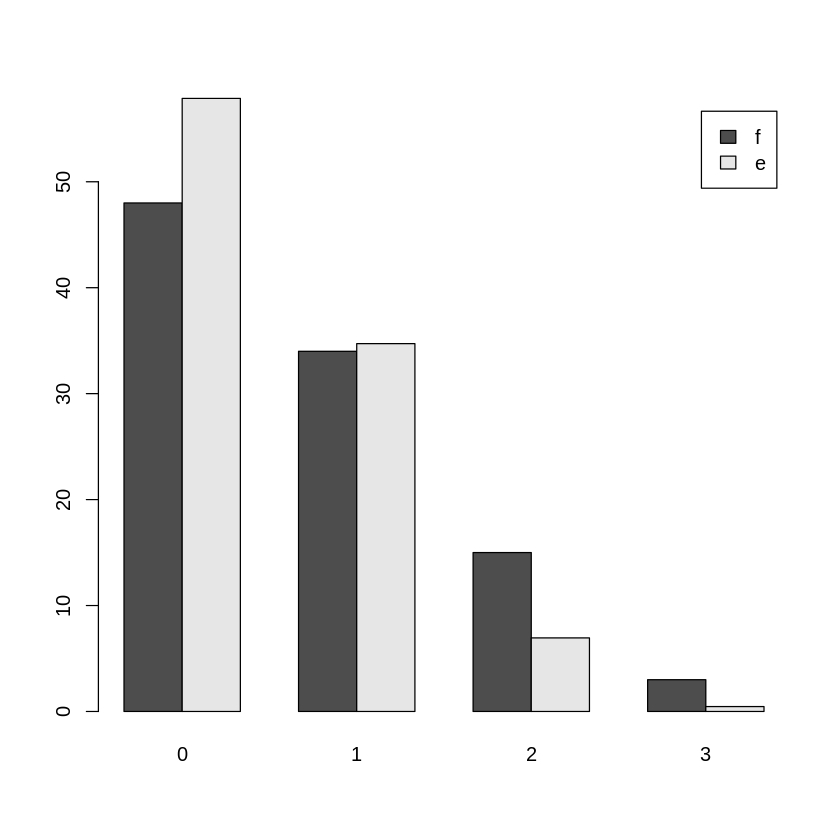

In [ ]:
e = 100 * dbinom(x, 3, 1/6) # p should equal 1/6

barplot(rbind(f,e), names.arg = x, beside = TRUE, legend.text = TRUE)

- The observation shows more 2 and 3 than expected and less 0 than expected.

**Question 2**

In [ ]:
chi_sq_stats = sum((f - e)^2 / e)
chi_sq_stats

[1] 24.94592

**Question 3**
- $H_0$: The dice is fair. 
- $H_1$: The dice is not fair 

**Question 4**

In [ ]:
qchisq(0.95, 3)

[1] 7.814728

- Since chi-square statistics is larger than chi-square value, we reject $H_0$ and conclude that the dice is not fair. 

In [ ]:
p_value = 1 - pchisq(chi_sq_stats, 3)
p_value

[1] 1.584777e-05

- p value is lesser than 0.05 and hence, we reject $H_0$. 

**Question 5**

In [ ]:
chisq.test(f, p = dbinom(x, 3, 1/6))

Warning message in chisq.test(f, p = dbinom(x, 3, 1/6)):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  f
X-squared = 24.946, df = 3, p-value = 1.585e-05


- p value is lesser than 0.05 and hence, we reject $H_0$ .

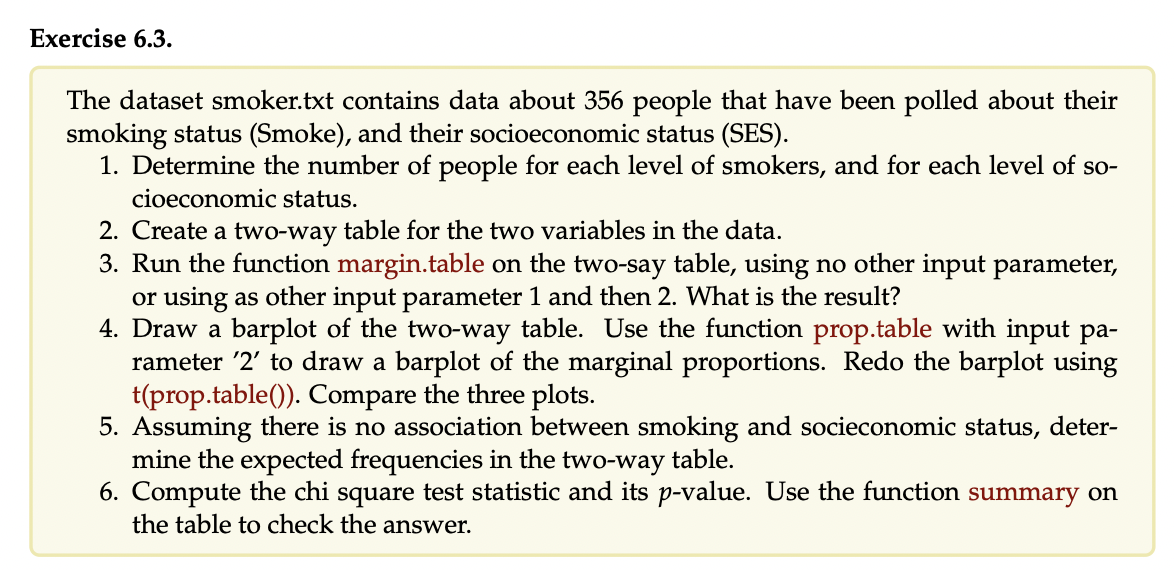

**Question 1 & 2**

In [49]:
smoke = read.table('smoke.txt', header = TRUE)
head(smoke)

,Smoke,SES
,<chr>,<chr>
1,former,High
2,former,High
3,former,High
4,former,High
5,former,High
6,former,High


In [52]:
smoke_tab = table(smoke)
smoke_tab

         SES
Smoke     High Low Middle
  current   51  43     22
  former    92  28     21
  never     68  22      9

**Question 3**

In [53]:
# Total number of observations 
margin.table(smoke_tab)

[1] 356

In [54]:
# Number of observations acc to smoke variable 
margin.table(smoke_tab, 1)

Smoke
current  former   never 
    116     141      99 

In [55]:
# Number of observations acc to SES variable 
margin.table(smoke_tab, 2)

SES
  High    Low Middle 
   211     93     52 

**Question 4**

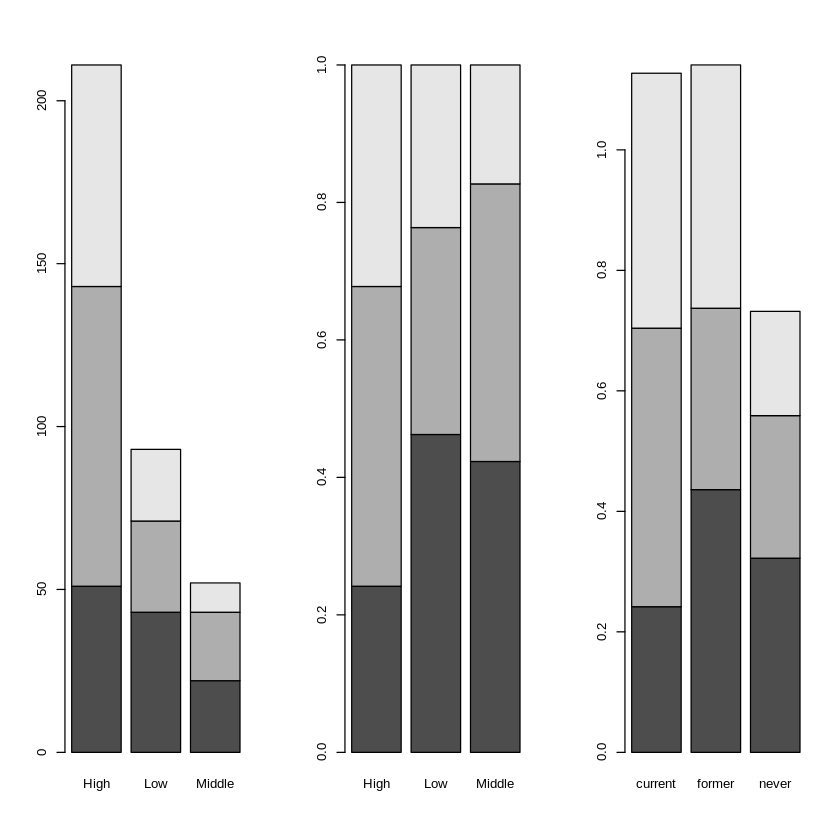

In [56]:
par(mfrow = c(1,3))
barplot(smoke_tab)
barplot(prop.table(smoke_tab, 2))
barplot(t(prop.table(smoke_tab, 2)))

- The middle plot is normalized and hence, it is easier to compare proportions within each bar. 
- The third plot flips the role of the variables. 

**Question 5**

In [57]:
expected = matrix(rowSums(smoke_tab), ncol = 1) %*% matrix(colSums(smoke_tab), ncol = 3) / sum(smoke_tab) # Formula for expected value 
expected 

68.75281,30.30337,16.94382
83.57022,36.83427,20.59551
58.67697,25.86236,14.46067


**Question 6**

In [58]:
chi = sum((smoke_tab - expected)^2 / expected) 
chi 

[1] 18.50974

In [60]:
p_value = 1 - pchisq(chi, (3-1)*(3-1))
p_value 

[1] 0.0009808236

In [62]:
chisq.test(smoke_tab)


	Pearson's Chi-squared test

data:  smoke_tab
X-squared = 18.51, df = 4, p-value = 0.0009808


- Since p-value < 0.05, we reject $H_0$ and conclude that there is an association between socioeconomic status and economic status. 

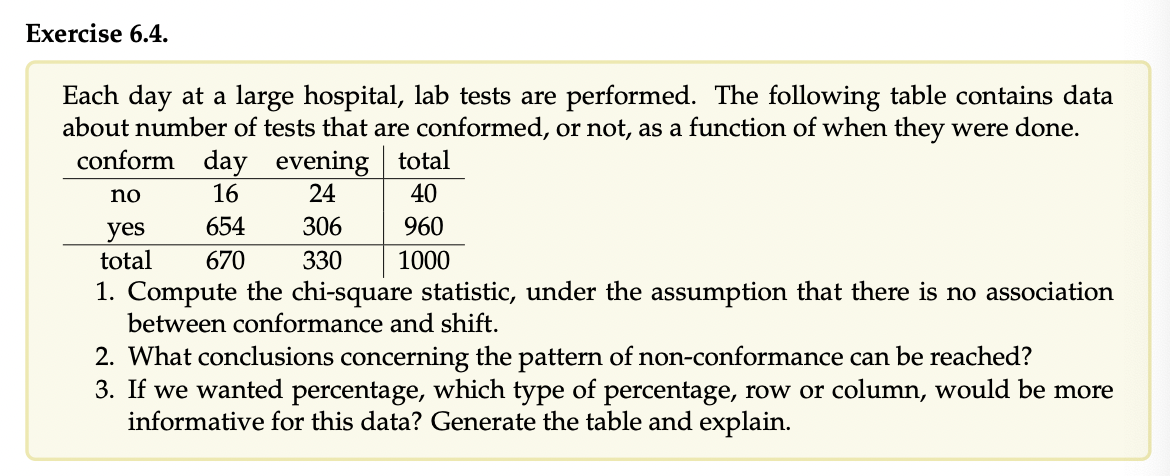

**Question 1 & 2**

In [64]:
lab = matrix(c(16, 654, 24, 306), ncol = 2)
colnames(lab) = c('day', 'evening')
rownames(lab) = c('no', 'yes')

lab_tab = as.table(lab)
lab_tab

    day evening
no   16      24
yes 654     306

In [68]:
expected = matrix(rowSums(lab_tab), ncol = 1) %*% matrix(colSums(lab_tab), ncol = 2) / sum(lab_tab) # Formula for expected value 
chi = sum((lab_tab - expected)^2 / expected)

p_val = 1 - pchisq(chi, (2 - 1)*(2 - 1))
p_val

[1] 0.0002101449

In [71]:
chisq.test(lab_tab, correct = FALSE) # Without continuity correction 


	Pearson's Chi-squared test

data:  lab_tab
X-squared = 13.738, df = 1, p-value = 0.0002101


- Since p-value < 0.05, we reject the null hypothesis that there is no association between the two variables.

**Question 3**

In [72]:
prop.table(lab_tab, 2)

           day    evening
no  0.02388060 0.07272727
yes 0.97611940 0.92727273

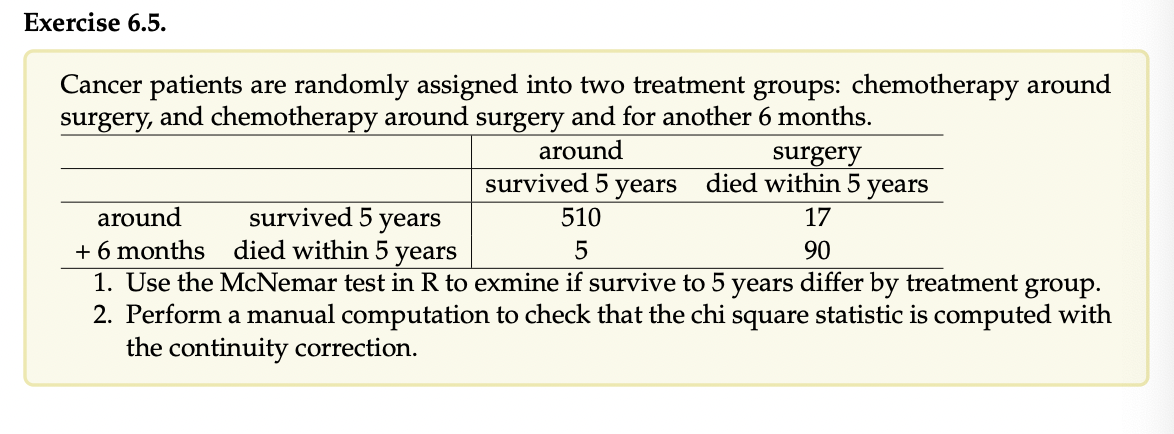

**Question 1**

In [73]:
cancer = matrix(c(510, 5, 17, 90), ncol = 2)
colnames(cancer) = c('survived', 'died')
rownames(cancer) = c('surgery + another 6 months', 'surgery only')
cancer_tab = as.table(cancer)
cancer_tab

                           survived died
surgery + another 6 months      510   17
surgery only                      5   90

In [74]:
mcnemar.test(cancer_tab)


	McNemar's Chi-squared test with continuity correction

data:  cancer_tab
McNemar's chi-squared = 5.5, df = 1, p-value = 0.01902


- Since p-value < 0.05, we reject the null hypothesis and conclude that the additional 6 months of treatment has affected the survival.

**Question 2**

In [75]:
# Calculate chi-square without continuity correction 

chi = (cancer_tab[1,2] - cancer_tab[2,1])^2 / (cancer_tab[1,2] + cancer_tab[2,1])
chi

[1] 6.545455

In [76]:
# Calculate chi-square with continuity correction 

chi = (abs(cancer_tab[1,2] - cancer_tab[2,1]) - 1)^2 / (cancer_tab[1,2] + cancer_tab[2,1])
chi 

[1] 5.5

- The chi-square is calculated with continuity correction.